In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load the data

In [4]:
df = pd.read_csv('../data/benin-malanville.csv')

Preview

In [5]:
df.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN


1. Summary Statistics

In [6]:
df.describe()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,240.559452,167.187516,115.358961,236.589496,228.883576,28.179683,54.487969,2.121113,2.809195,0.473390,153.435172,8.582407,994.197199,0.000923,0.001905,35.246026,32.471736,NaN
std,331.131327,261.710501,158.691074,326.894859,316.536515,5.924297,28.073069,1.603466,2.029120,0.273395,102.332842,6.385864,2.474993,0.030363,0.037115,14.807258,12.348743,NaN
min,-12.900000,-7.800000,-12.600000,0.000000,0.000000,11.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,985.000000,0.000000,0.000000,9.000000,8.100000,NaN
25%,-2.000000,-0.500000,-2.100000,0.000000,0.000000,24.200000,28.800000,1.000000,1.300000,0.400000,59.000000,3.700000,993.000000,0.000000,0.000000,24.200000,23.600000,NaN
50%,1.800000,-0.100000,1.600000,4.500000,4.300000,28.000000,55.100000,1.900000,2.600000,0.500000,181.000000,8.600000,994.000000,0.000000,0.000000,30.000000,28.900000,NaN
75%,483.400000,314.200000,216.300000,463.700000,447.900000,32.300000,80.100000,3.100000,4.100000,0.600000,235.100000,12.300000,996.000000,0.000000,0.000000,46.900000,41.500000,NaN
max,1413.000000,952.300000,759.200000,1342.300000,1342.300000,43.800000,100.000000,19.500000,26.600000,4.200000,360.000000,99.400000,1003.000000,1.000000,2.500000,81.000000,72.500000,NaN


Missing values

In [7]:
df.isna().sum()

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

Drop the 'Comments' column

In [8]:
df.drop(columns=['Comments'], inplace=True)

No missing values were found in numerical features.
The `Comments` column contained 525,600 missing entries and has been dropped from the dataset due to lack of useful information.

2. Outlier Detection

Key Columns for Z-score:-
GHI, DNI, DHI — solar irradiance, 
ModA, ModB — sensor readings, 
WS, WSgust — wind data

In [9]:
from scipy.stats import zscore

# Select relevant columns
z_columns = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

# Compute Z-scores
z_scores = df[z_columns].apply(zscore)

# Flag rows with any |Z| > 3
outliers = (z_scores.abs() > 3).any(axis=1)

# Count of outliers
print(f"Number of outlier rows: {outliers.sum()}")

# view them
df[outliers].head()


Number of outlier rows: 7740


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
670,2021-08-09 11:11,836.0,235.0,610.6,778.8,783.8,30.3,68.2,3.2,4.1,0.7,190.5,18.4,999,0,0.0,63.0,52.7
671,2021-08-09 11:12,1274.0,698.8,615.2,1210.3,1210.3,30.1,69.6,3.4,4.1,0.6,175.8,13.3,999,0,0.0,63.7,53.1
672,2021-08-09 11:13,938.0,340.1,612.8,891.1,891.1,30.4,68.4,3.4,4.6,0.9,171.5,11.9,999,0,0.0,65.8,54.3
673,2021-08-09 11:14,718.5,126.8,593.2,682.6,682.6,30.6,68.2,4.7,5.6,0.6,160.7,8.0,999,0,0.0,65.4,54.2
674,2021-08-09 11:15,1349.0,771.8,618.0,1281.5,1281.5,30.9,67.1,4.0,4.6,0.4,169.1,12.3,999,0,0.0,65.0,53.5


In [10]:
# Remove outlier rows
df_clean = df[~outliers].copy()

In [11]:
# Export Cleaned CSV
df_clean.to_csv('../data/benin_clean.csv', index=False)

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned data
df = pd.read_csv('../data/benin_clean.csv')

# Convert Timestamp to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

Plot Time Series

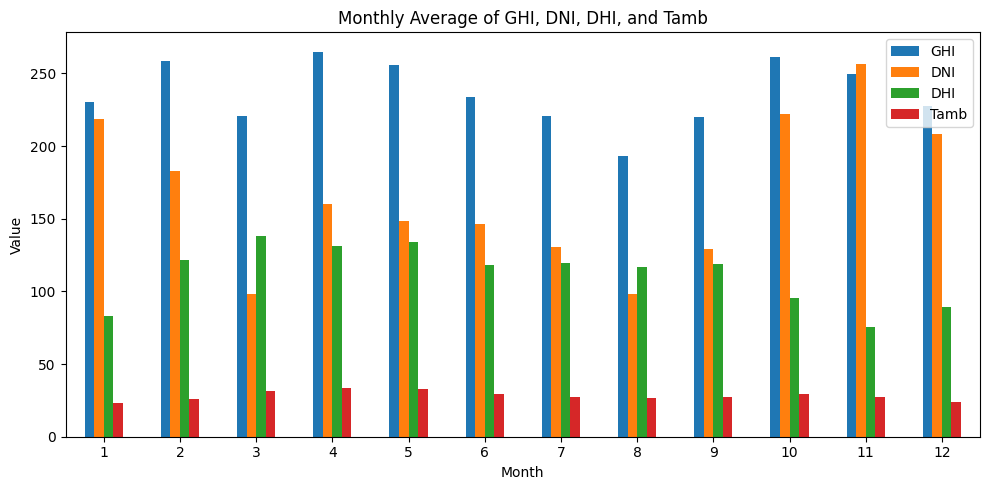

In [17]:
df['Month'] = df['Timestamp'].dt.month

# Monthly average
monthly_avg = df.groupby('Month')[['GHI', 'DNI', 'DHI', 'Tamb']].mean()

# Plot
monthly_avg.plot(kind='bar', figsize=(10, 5))
plt.title('Monthly Average of GHI, DNI, DHI, and Tamb')
plt.ylabel('Value')
plt.xlabel('Month')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Heatmap of Correlation

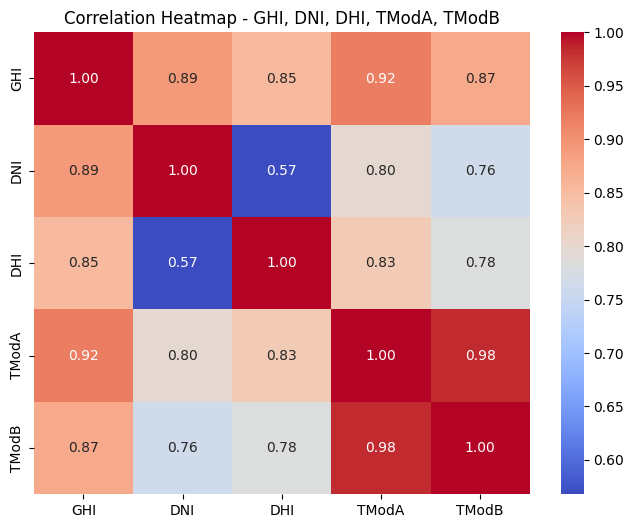

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant columns
corr_columns = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']
corr_matrix = df_clean[corr_columns].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap - GHI, DNI, DHI, TModA, TModB")
plt.show()

Scatter Plots ->
Wind Speed (WS), Gust (WSgust), Direction (WD) vs. GHI

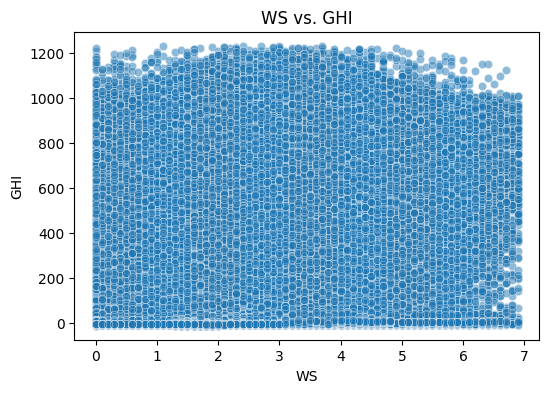

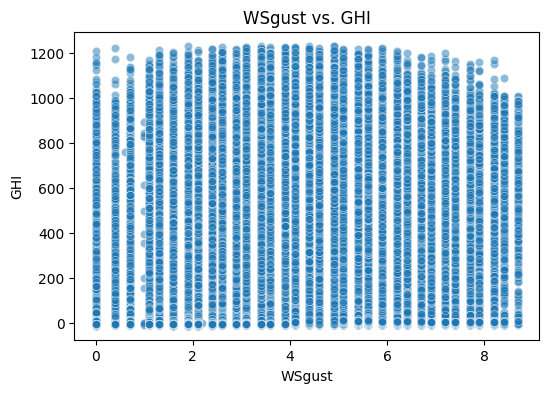

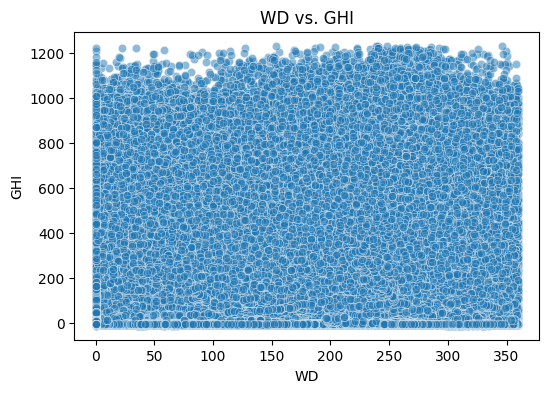

In [19]:
scatter_cols = ['WS', 'WSgust', 'WD']
for col in scatter_cols:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=df_clean, x=col, y='GHI', alpha=0.5)
    plt.title(f'{col} vs. GHI')
    plt.xlabel(col)
    plt.ylabel('GHI')
    plt.show()

Relative Humidity vs. Tamb

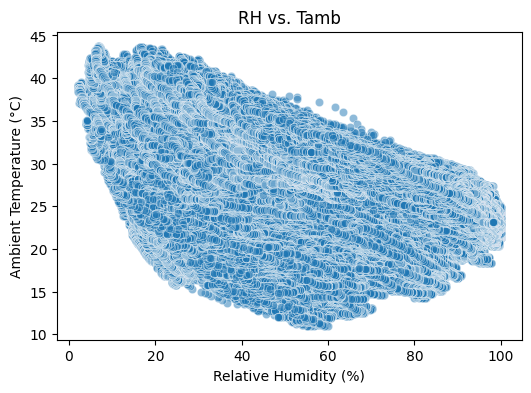

In [20]:
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df_clean, x='RH', y='Tamb', alpha=0.5)
plt.title('RH vs. Tamb')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Ambient Temperature (°C)')
plt.show()

plot the wind rose

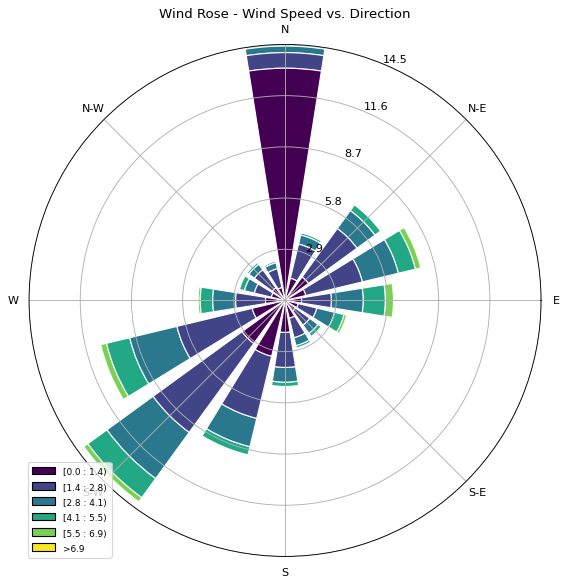

In [21]:
from windrose import WindroseAxes
import matplotlib.pyplot as plt

# Create wind rose
ax = WindroseAxes.from_ax()
ax.bar(df_clean['WD'], df_clean['WS'], normed=True, opening=0.8, edgecolor='white')
ax.set_legend()
plt.title("Wind Rose - Wind Speed vs. Direction")
plt.show()


Histograms

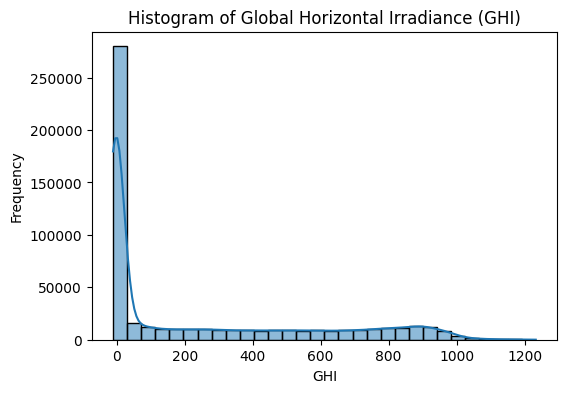

In [23]:
# GHI Distribution
plt.figure(figsize=(6, 4))
sns.histplot(df_clean['GHI'], bins=30, kde=True)
plt.title("Histogram of Global Horizontal Irradiance (GHI)")
plt.xlabel("GHI")
plt.ylabel("Frequency")
plt.show()

In [ ]:
#WS Distribution
plt.figure(figsize=(6, 4))
sns.histplot(df_clean['WS'], bins=30, kde=True, color='orange')
plt.title("Histogram of Wind Speed (WS)")
plt.xlabel("Wind Speed (m/s)")
plt.ylabel("Frequency")
plt.show()